# Beer dataset exploratory data analysis

### The purpose of this notebook is to conduct exploratory data analysis on the beer dataset and the steps taken are as follows:

1. Data cleaning <br>
   1.1 Removing missing values<br>
   1.2 Removing duplicates<br>
2. Overview of the dataset<br>
3. Describing the dataset <br>
4. Visualising the data <br>
   4.1 The Top 10 beers<br>
   4.2 The Top 10 beer styles<br>
   4.3 The Top 10 breweries<br>
   4.4 Beers with the highest average ratings based on overall reviews<br>
5. Narrowing it down to two glorious beers! - exporting so visualisations can be done in Tableau <br>
6. Further analysis <br>

## 1. Data cleaning

#### 1.1 Removing missing values

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read beer_reviews.csv and create dataframe
df = pd.read_csv("beer_reviews.csv")

In [3]:
#have a look at a data sample of the first 5 rows in the dataframe
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
#get a description of the data showing the column names, number of rows, missing values (analyse range index in comparison to len(df)) & data types 
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 133.2+ MB


1586614

In [5]:
#Get all rows with missing values (NaN) - 68136
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
273,1075,Caldera Brewing Company,1103668195,3.0,3.0,3.0,RedDiamond,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN,21241
430,850,Moon River Brewing Company,1110736110,3.5,4.0,4.5,cMonkey,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
603,850,Moon River Brewing Company,1100038819,4.0,3.5,4.0,aracauna,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
733,1075,Caldera Brewing Company,1260673921,4.0,4.0,4.0,plaid75,American IPA,4.0,4.0,Alpha Beta,NaN,54723
798,1075,Caldera Brewing Company,1212201268,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586568,14359,The Defiant Brewing Company,1187052567,4.0,3.5,4.0,maddogruss,Bock,4.0,4.0,Bock,NaN,36424
1586587,14359,The Defiant Brewing Company,1177842168,3.5,4.5,4.0,BBM,Maibock / Helles Bock,4.5,4.0,Maibock,NaN,36555
1586596,14359,The Defiant Brewing Company,1287951067,4.0,3.0,5.0,hoppymcgee,Belgian Strong Pale Ale,4.0,3.5,Resolution #2,NaN,48360
1586597,14359,The Defiant Brewing Company,1241906223,4.5,4.5,4.0,WesWes,Belgian Strong Pale Ale,4.0,4.0,Resolution #2,NaN,48360


#### 1st checkpoint:
1. Columns with missing values:<br>
-brewery_name <br>
-review_profilename <br>
-beer_abv <br>

The rows of these columns with missing values (68136 as shown in the above code) will be removed to ensure that we only use valid data in finding the ultimate beer! 

The number of rows dropped as shown in the below code is 68136 which matches our expectations.

A new dataframe (df1 in this case) will be created everytime changes are made to allow for checkpoints to be saved (notebook best practices).

In [6]:
#drop the rows with at least 1 missing value
df1 = df.dropna()
df1.info()
print("The number of dropped rows with missing values:" + " " + str(len(df) - len(df1)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1518478 non-null int64
brewery_name          1518478 non-null object
review_time           1518478 non-null int64
review_overall        1518478 non-null float64
review_aroma          1518478 non-null float64
review_appearance     1518478 non-null float64
review_profilename    1518478 non-null object
beer_style            1518478 non-null object
review_palate         1518478 non-null float64
review_taste          1518478 non-null float64
beer_name             1518478 non-null object
beer_abv              1518478 non-null float64
beer_beerid           1518478 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 139.0+ MB
The number of dropped rows with missing values: 68136


#### 1.2 Removing duplicates

Duplicates may exist if reviewers have reviewed a specific beer more than once. In this case, the highest review will be taken and the rest will be removed from the analysis.

The subset to be considered are the 'review_profilename' & 'beer_name' columns as this will give us which beers were rated by the same reviewers more than once.

In [7]:
df2 = df1.drop_duplicates( subset = ['review_profilename', 'beer_name'], keep = 'first')

In [121]:
df2.info()
print("The number of dropped rows with duplicate values:" + " " + str(len(df1) - len(df2)))

df2['review_time']= pd.to_datetime(df2['review_time'], format="%H:%M:%S,%m/%d/%Y")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496263 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1496263 non-null int64
brewery_name          1496263 non-null object
review_time           1496263 non-null datetime64[ns]
review_overall        1496263 non-null float64
review_aroma          1496263 non-null float64
review_appearance     1496263 non-null float64
review_profilename    1496263 non-null object
beer_style            1496263 non-null object
review_palate         1496263 non-null float64
review_taste          1496263 non-null float64
beer_name             1496263 non-null object
beer_abv              1496263 non-null float64
beer_beerid           1496263 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 169.0+ MB
The number of dropped rows with duplicate values: 22215


C:\Users\pyari\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### 2nd checkpoint

1. df2: 22215 rows with duplicates were removed leaving us with a dataset of 1496263 reviews.

## 2. Overview of the dataset

Since we want to find 2 beers worth recommending it is important to get a feel for the number of different beers, breweries, users, beer types and reviews in the dataset.

In [9]:
#get a distinct count of data in each column of interest using df.nunique()
print("The number of unique values in each column are:" + "\n" + str(df2.nunique()))

The number of unique values in each column are:
brewery_id               5210
brewery_name             5135
review_time           1488440
review_overall             10
review_aroma                9
review_appearance          10
review_profilename      32908
beer_style                104
review_palate               9
review_taste                9
beer_name               44075
beer_abv                  529
beer_beerid             48656
dtype: int64


#### From the above output we can see the following:
The number of unique breweries: 5135 <br>
The number of unique reviewers: 32908 <br>
The number of unique beer styles: 104 <br>
The number of unique beers: 44075 <br>

The other columns contain float data types of actual review ratings thus it is not useful to get unique values for these columns.

## 3. Describing the dataset

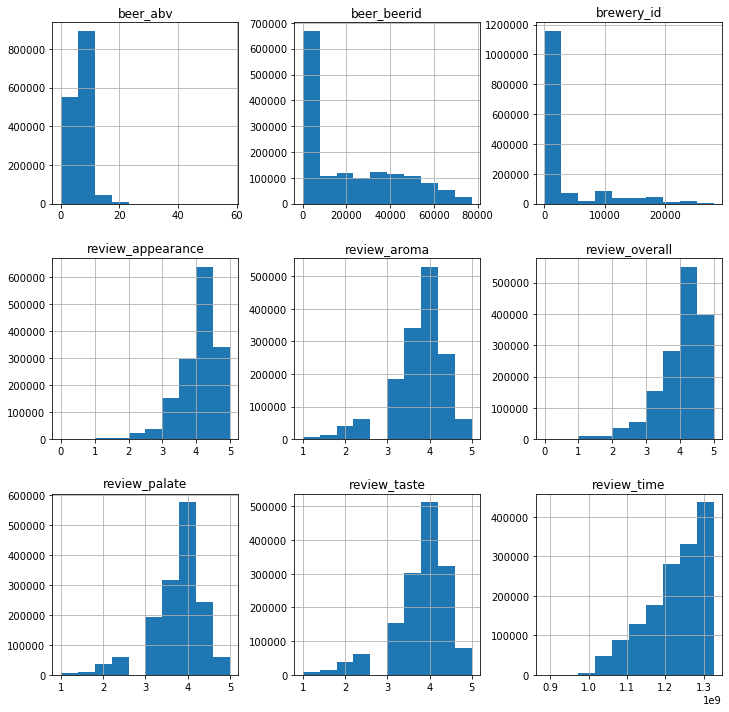

In [110]:
#Get a feel for the data distribution - there seems to be a spike at reviews from 3.5 to 4.5
df2.hist(figsize=(12,12))

plt.show()

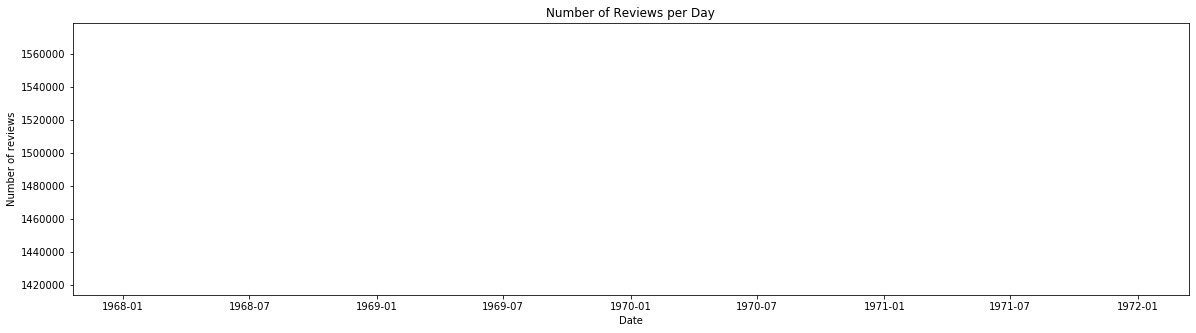

In [127]:
#time series to see how the ratings are spread over time 
group_by_date = df2[ [ 'review_time' ] ].groupby( df2[ 'review_time' ].dt.date ).agg( [ 'count' ] )
plt.figure( figsize = ( 20, 5 ) )
plt.plot( group_by_date.index, group_by_date.values)
plt.xlabel( 'Date' )
plt.ylabel( 'Number of reviews' )
plt.title( 'Number of Reviews per Day' )
plt.show()

### Correlation will allow us to see if there are any relationships between attributes that may give us a better understanding

From the below code we can see that review_taste is the most positively correlated to review_overall with 0.787 followed by palate, aroma and lasly appearance.

In [128]:
df2.corr(method ='pearson')

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
brewery_id,1.000000,-0.007950,0.022347,0.004685,0.001428,-0.000066,0.064243,0.418847
review_overall,-0.007950,1.000000,0.612798,0.498496,0.698947,0.787350,0.138362,0.004331
review_aroma,0.022347,0.612798,1.000000,0.558874,0.614575,0.714501,0.332326,0.079676
review_appearance,0.004685,0.498496,0.558874,1.000000,0.564295,0.544277,0.263707,0.057265
review_palate,0.001428,0.698947,0.614575,0.564295,1.000000,0.732024,0.286397,0.045960
review_taste,-0.000066,0.787350,0.714501,0.544277,0.732024,1.000000,0.290543,0.031834
beer_abv,0.064243,0.138362,0.332326,0.263707,0.286397,0.290543,1.000000,0.201023
beer_beerid,0.418847,0.004331,0.079676,0.057265,0.045960,0.031834,0.201023,1.000000


In [10]:
#first we describe the string data and find the values that occur most frequently
df2.describe(include = 'object')

,brewery_name,review_profilename,beer_style,beer_name
count,1496263,1496263,1496263,1496263
unique,5135,32908,104,44075
top,Boston Beer Company (Samuel Adams),northyorksammy,American IPA,90 Minute IPA
freq,38533,5177,110425,3206


In [11]:
#now we describe the numerical data which includes all the reviews
df2.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.496263e+06,1.496263e+06,1.496263e+06,1.496263e+06,1.496263e+06,1.496263e+06,1.496263e+06,1.496263e+06,1.496263e+06
mean,3.068146e+03,1.225593e+09,3.822387e+00,3.745287e+00,3.849503e+00,3.752557e+00,3.802741e+00,7.045868e+00,2.143449e+04
std,5.540524e+03,7.572180e+07,7.178374e-01,6.956705e-01,6.145845e-01,6.796260e-01,7.291700e-01,2.325997e+00,2.179831e+04
min,1.000000e+00,8.843904e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,5.000000e+00
25%,1.410000e+02,1.175915e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.655000e+03
50%,4.140000e+02,1.240608e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.289500e+04
75%,2.250000e+03,1.289257e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.927300e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731600e+04


## 4. Visualising the data

### The top 10 beers

In [12]:
df2['beer_name'].value_counts()[:20]

90 Minute IPA                                 3206
Old Rasputin Russian Imperial Stout           3038
Sierra Nevada Celebration Ale                 2929
Stone Ruination IPA                           2644
Arrogant Bastard Ale                          2633
Two Hearted Ale                               2631
Stone IPA (India Pale Ale)                    2526
Sierra Nevada Pale Ale                        2526
La Fin Du Monde                               2480
Duvel                                         2448
Founders Breakfast Stout                      2443
Sierra Nevada Bigfoot Barleywine Style Ale    2443
Pliny The Elder                               2432
60 Minute IPA                                 2429
Brooklyn Black Chocolate Stout                2405
Storm King Stout                              2392
Bell's Hopslam Ale                            2347
Samuel Adams Boston Lager                     2347
Stone Imperial Russian Stout                  2285
HopDevil Ale                   

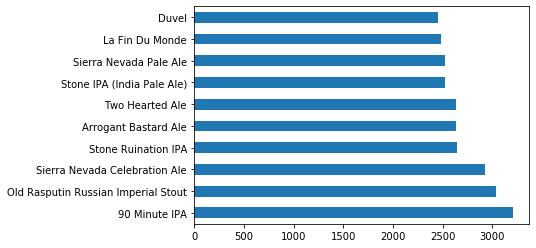

In [13]:
top_10_beers = df2['beer_name'].value_counts()[:10]
top_10_beers.plot(kind='barh')
plt.show()

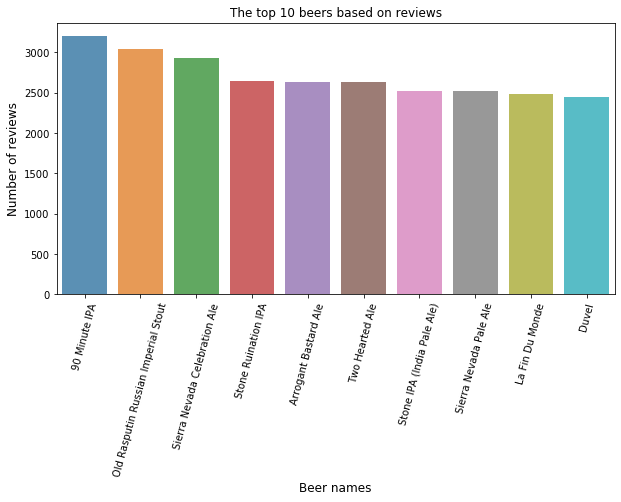

In [14]:
plt.figure(figsize=(10,5))
top_10_beerplot = sns.barplot(top_10_beers.index, top_10_beers.values, alpha=0.8)
for item in top_10_beerplot.get_xticklabels():
    item.set_rotation(75)
plt.title('The top 10 beers based on reviews')
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Beer names', fontsize=12)
plt.show()

### The top 10 beer styles

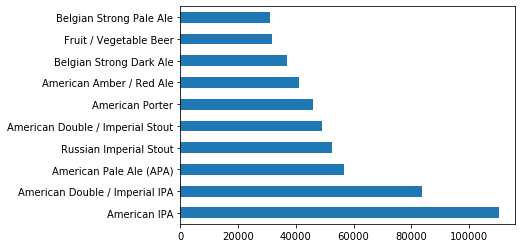

In [15]:
top_10_beertypes = df2['beer_style'].value_counts()[:10]
top_10_beertypes.plot(kind='barh')
plt.show()

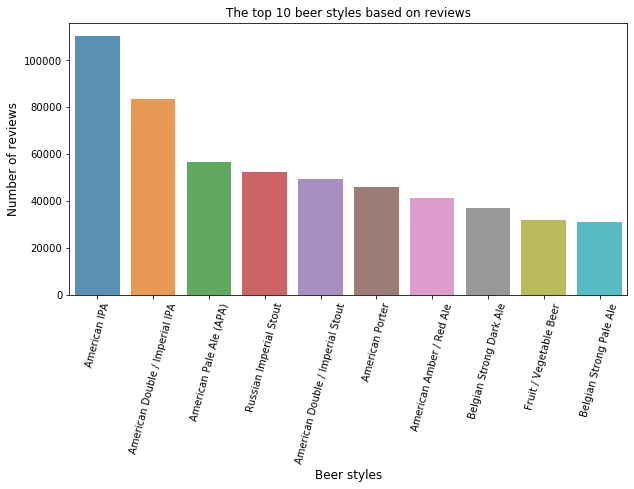

In [16]:
plt.figure(figsize=(10,5))
top_10_styleplot = sns.barplot(top_10_beertypes.index, top_10_beertypes.values, alpha=0.8)
for item in top_10_styleplot.get_xticklabels():
    item.set_rotation(75)
plt.title('The top 10 beer styles based on reviews')
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Beer styles', fontsize=12)
plt.show()

### The top 10 breweries

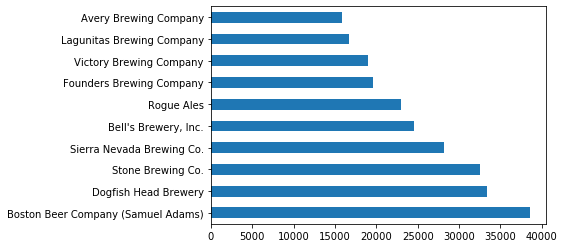

In [17]:
top_10_breweries = df2['brewery_name'].value_counts()[:10]
top_10_breweries.plot(kind='barh')
plt.show()

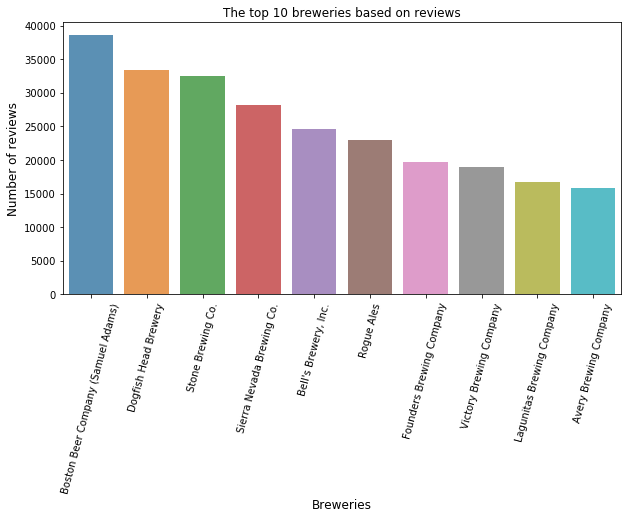

In [18]:
plt.figure(figsize=(10,5))
top_10_breweryplot = sns.barplot(top_10_breweries.index, top_10_breweries.values, alpha=0.8)
for item in top_10_breweryplot.get_xticklabels():
    item.set_rotation(75)
plt.title('The top 10 breweries based on reviews')
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Breweries', fontsize=12)
plt.show()

### Beers with the highest average ratings based on overall reviews

In [92]:
beer_groups = df2[['beer_name', 'review_overall']].groupby('beer_name').agg('mean')
bgdf = beer_groups.sort_values(by='review_overall', ascending=False).head(10)
bgdf

,review_overall
beer_name,
Kringle's Imperial Stout,5.0
Emerald City Cream Ale,5.0
Renæssance 2006,5.0
C4 Red Ale,5.0
Wild Bill's Session IPA,5.0
961 IPA (India Pale Ale),5.0
Galaxy Golden Ale,5.0
New World IPA,5.0
Neuvaine,5.0


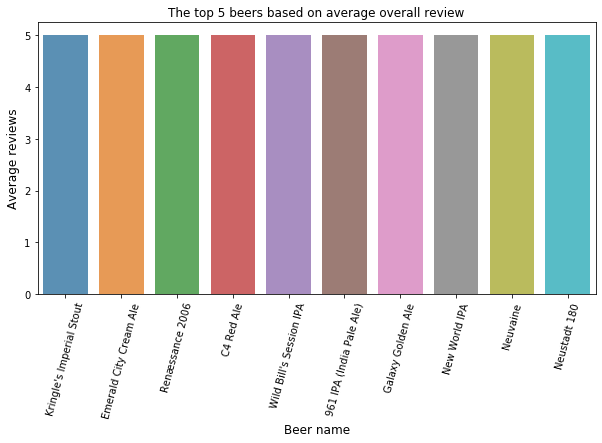

In [94]:
plt.figure(figsize=(10,5))
beer_groups_plot = sns.barplot(x = bgdf.index, y = bgdf.review_overall, alpha=0.8)
for item in beer_groups_plot.get_xticklabels():
    item.set_rotation(75)
plt.title('The top 5 beers based on average overall review')
plt.ylabel('Average reviews', fontsize=12)
plt.xlabel('Beer name', fontsize=12)
plt.show()

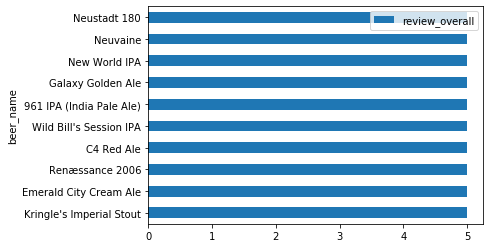

In [21]:
bgdf.plot(kind='barh')

## 5. Narrowing it down to two glorious beers! - exporting so visualisations can be done in Tableau

In [95]:
dfgmask = df2['beer_name'].isin(["Kringle's Imperial Stout",'Emerald City Cream Ale','Renæssance 2006','C4 Red Ale',"Wild Bill's Session IPA"])

In [96]:
df2[dfgmask]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
632576,1112,Little Apple Brewing Company,1043400255,5.0,3.0,3.5,marc77,Russian Imperial Stout,3.0,3.5,Kringle's Imperial Stout,9.2,8222
766212,4410,Back Street Brewery,1287375541,5.0,4.5,4.0,Overlord,American IPA,5.0,4.0,Wild Bill's Session IPA,4.8,62709
1069616,456,Trinity Brewhouse,1313445424,5.0,4.5,4.0,taez555,American Amber / Red Ale,4.5,5.0,C4 Red Ale,7.5,72131
1430764,10799,Ham's Restaurant & Brewhouse,1237246782,5.0,4.0,3.5,cvstrickland,Cream Ale,4.0,4.0,Emerald City Cream Ale,5.8,48501
1476347,11403,Fur Bryghus,1189269522,5.0,4.5,4.5,bark,English Brown Ale,4.0,4.5,Renæssance 2006,6.2,38557


### It has become apparent that the top 5 beers with the highest average rating do not have more than one review which is misleading. In order to select a highly rated beer it needs to be free from bias by having a larger number of reviews with a certain percentage of significance.

### In order to test this, the count of overall reviews is taken to be greater than 1000 and the mean > 4.5

In [99]:
beer_groups1 = df2[['beer_name', 'review_overall']].groupby('beer_name').agg(['count','mean'])
mask1 = beer_groups1['review_overall', 'mean'] > 4.5
mask2 = beer_groups1['review_overall', 'count'] > 1000
mask3 = pd.concat((mask1, mask2), axis=1).all(axis=1)

In [100]:
beer_groups1[mask1]

review_overall          
                                         count      mean
beer_name                                               
10th Anniversary Strong Belgian              1  5.000000
2005 Grand Cru                               1  5.000000
2006 Barley Wine (Triple IPA)                1  5.000000
22 Porter                                    2  4.750000
3 Threads                                    1  5.000000
...                                        ...       ...
Ziguljovskoje Helles Bier                    1  5.000000
Zombie Dust                                383  4.507833
Zucker Esel Pils                             3  4.833333
Zwiesel Löwentrunk                           1  5.000000
Ølfabrikken Trippel                          3  4.666667

[813 rows x 2 columns]

In [102]:
#the percentage of beers that have a overall review > 4.5 is 1.845%
len(beer_groups1[mask1])/len(beer_groups1)

0.018445830969937606

In [27]:
beer_groups1.columns

MultiIndex([('review_overall', 'count'),
            ('review_overall',  'mean')],
           )

In [28]:
beer_groups1[mask2].sort_values(by=[('review_overall','mean')], ascending = False)

review_overall          
                                       count      mean
beer_name                                             
Trappist Westvleteren 12                1272  4.617925
Pliny The Elder                         2432  4.593544
Weihenstephaner Hefeweissbier           1951  4.516146
The Abyss                               1366  4.447657
Sculpin India Pale Ale                  1295  4.435521
...                                      ...       ...
Budweiser                               1418  2.873061
Miller Lite                             1040  2.758173
Corona Extra                            1082  2.609057
Coors Light                             1129  2.572631
Bud Light                               1252  2.411741

[199 rows x 2 columns]

In [104]:
#the percentage of beers that have a overall review count > 1000 is 0.45%
len(beer_groups1[mask2])/len(beer_groups1)

0.0045150311968235966

In [105]:
beer_groups1[mask3].sort_values(by=[('review_overall','mean')], ascending = False)

review_overall          
                                       count      mean
beer_name                                             
Trappist Westvleteren 12                1272  4.617925
Pliny The Elder                         2432  4.593544
Weihenstephaner Hefeweissbier           1951  4.516146

#### Pliny The Elder would be a favourable choice given that the overall review counts are the highest and that the average review is less than 2 basis points away from the highest average review.

#### However, it is important to inspect the data for Pliny to confirm assumptions across all characteristic reviews as these are also important 

In [106]:
beer_mask1 = df2['beer_name'] == "Pliny The Elder" 
beer_mask2 = df2[['beer_name','review_taste']].groupby('beer_name').agg('mean') > 4.5
beer_mask3 = df2[['beer_name','review_aroma']].groupby('beer_name').agg('mean') > 4.5
beer_mask4 = df2[['beer_name','review_appearance']].groupby('beer_name').agg('mean') > 4.5
beer_mask5 = df2[['beer_name','review_palate']].groupby('beer_name').agg('mean') > 4
#beer_mask6 = df2[['beer_name', 'review_overall']].groupby('beer_name').agg('count') > 1000

beer_mask7 = pd.concat((beer_mask1,beer_mask4), axis=1).all(axis=1)

In [107]:
top_10_overall = df2[beer_mask7].sort_values(by='review_overall', ascending=False).head(10)
top_10_overall

C:\Users\pyari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1127975,863,Russian River Brewing Company,1283617602,5.0,5.0,5.0,SteelKettle,American Double / Imperial IPA,4.5,5.0,Pliny The Elder,8.0,7971
1134937,863,Russian River Brewing Company,1314497292,5.0,4.5,4.5,lazyboy247,American Double / Imperial IPA,5.0,5.0,Pliny The Elder,8.0,7971
1134632,863,Russian River Brewing Company,1217439764,5.0,4.5,5.0,HopDerek,American Double / Imperial IPA,5.0,4.5,Pliny The Elder,8.0,7971
1134630,863,Russian River Brewing Company,1217467408,5.0,5.0,4.0,prototypic,American Double / Imperial IPA,5.0,4.5,Pliny The Elder,8.0,7971
1134629,863,Russian River Brewing Company,1217472950,5.0,5.0,4.5,THEBEERBAR0N,American Double / Imperial IPA,4.5,5.0,Pliny The Elder,8.0,7971
1134623,863,Russian River Brewing Company,1217785103,5.0,4.0,4.0,ralree,American Double / Imperial IPA,4.5,5.0,Pliny The Elder,8.0,7971
1134615,863,Russian River Brewing Company,1218069934,5.0,4.5,4.5,AKBelgianBeast,American Double / Imperial IPA,4.5,4.5,Pliny The Elder,8.0,7971
1134613,863,Russian River Brewing Company,1218079132,5.0,5.0,4.5,fo5s,American Double / Imperial IPA,4.0,4.5,Pliny The Elder,8.0,7971
1134612,863,Russian River Brewing Company,1218251032,5.0,4.5,4.5,redneckchugger,American Double / Imperial IPA,5.0,5.0,Pliny The Elder,8.0,7971
1134610,863,Russian River Brewing Company,1218375126,5.0,4.5,4.0,TheodorHerzl,American Double / Imperial IPA,4.5,4.0,Pliny The Elder,8.0,7971


#### At this point we have isolated 3 beers based on overall review counts of greater than 1000 and average overall reviews > 4.5

#### However, in analysing the results for Pliny The Elder, it can be seen that the beer characteristic reviews (taste, appearance, palate and aroma) are not all above 4.5

#### In determining the "best" 2 beers, it would be imperative to look at all reviews and not just the overall as perhaps a "perfect" beer exists which can achieve a rating of greater than 4 across all characteristic reviews and still have an overall review count which is significant (80% of the highest beer overall review count

#### In order to easily do this by filtering the dataset for these above conditions, the exported csv file with all the data cleaning changes (df2) will be visualized in Tableau

In [108]:
df2.to_csv(r'C:\Users\pyari\beer_reviews_python.csv')

## 6. Further Analysis

An interesting idea to ensure that the best beer is selected may be to predict the overall review based on the characteristics reviews.

As previouosly discussed in describing the data, correlation indicates an positive or negative relationships thatmay give us insight into whether regression is useful to predict the overall reviews of beers in future.

From the below code we can see that review_taste is the most positively correlated to review_overall with 0.787 followed by palate, aroma and lasly appearance.

In [130]:
df2.corr(method = 'pearson')

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
brewery_id,1.000000,-0.007950,0.022347,0.004685,0.001428,-0.000066,0.064243,0.418847
review_overall,-0.007950,1.000000,0.612798,0.498496,0.698947,0.787350,0.138362,0.004331
review_aroma,0.022347,0.612798,1.000000,0.558874,0.614575,0.714501,0.332326,0.079676
review_appearance,0.004685,0.498496,0.558874,1.000000,0.564295,0.544277,0.263707,0.057265
review_palate,0.001428,0.698947,0.614575,0.564295,1.000000,0.732024,0.286397,0.045960
review_taste,-0.000066,0.787350,0.714501,0.544277,0.732024,1.000000,0.290543,0.031834
beer_abv,0.064243,0.138362,0.332326,0.263707,0.286397,0.290543,1.000000,0.201023
beer_beerid,0.418847,0.004331,0.079676,0.057265,0.045960,0.031834,0.201023,1.000000


### A scatter plot will allow us to investigate whether a relationship does exist between tatse and overall reviews

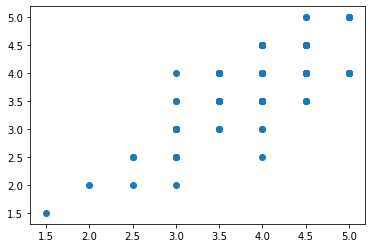

In [139]:
#Lets test this relationship - there seems to be an upward linear trend as expected through correlation!
plt.scatter(df2['review_overall'].head(200), df2['review_taste'].head(200))
plt.show()

In [154]:
#linear regression
df3 = df2[['review_taste','review_aroma', 'review_palate', 'review_appearance', 'review_overall']]
X = df3.loc[:10000, df3.columns != 'review_overall']
y = df3.loc[:10000, df3.columns == 'review_overall']

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.7071991545761278

In [155]:
reg.coef_

array([[0.57066224, 0.05667164, 0.2288651 , 0.05726315]])

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [157]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
y_pred = regressor.predict(X_test)

In [166]:
df4 = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
df4

,Actual,Predicted
0,review_overall 6750 5.0 9979...,"[[4.621702183266249], [1.8319499649061268], [3..."
